# 特征工程1.0

## 一、基本数值特征

### (一)数据准备

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns 

In [2]:
df=pd.read_csv(r'D:\文件\学习\数据集\HR\data\HR.csv')
#删除缺失值
df=df.dropna()
#删除department中的错误类别sale
df=df[df['department']!='sale']

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


### (二) 离散值数值化

#### 1、LabelEncoder

In [5]:
#查看当前离散值字段department的分类数量
genres=np.unique(df['department'])
genres

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [6]:
#文本类特征数值化,可以借助LabelEncoder
from sklearn.preprocessing import LabelEncoder
gle=LabelEncoder()
df['department_code']=gle.fit_transform(df['department'])
#查看变换后的映射结果
genre_mapping={index:label for index,label in enumerate(gle.classes_)}
genre_mapping

{0: 'IT',
 1: 'RandD',
 2: 'accounting',
 3: 'hr',
 4: 'management',
 5: 'marketing',
 6: 'product_mng',
 7: 'sales',
 8: 'support',
 9: 'technical'}

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,department_code
0,0.38,0.53,2,157,3,0,1,0,sales,low,7
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7
3,0.72,0.87,5,223,5,0,1,0,sales,low,7
4,0.37,0.52,2,159,3,0,1,0,sales,low,7


#### 2、哑变量或者one-hot Encoder

In [8]:
#get_dummies可以整体判断，直接输入数据集，会自动判断哪些是离散值
department_dummy=pd.get_dummies(df['department'],prefix='department')
df=pd.concat([df,department_dummy],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


### （三）二值化

#### 1、Binarizer

In [9]:
from sklearn.preprocessing import Binarizer
#threshold=0.5表示大于0.5的标记为1，小于0.5的标记为0
satis_level=Binarizer(threshold=0.5).fit_transform(df['satisfaction_level'].values.reshape(-1,1)).reshape(1,-1)[0]
satis_level=pd.DataFrame(satis_level)
satis_level.columns=['satis_yes_no']
df=pd.concat([df,satis_level],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,satis_yes_no
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,0.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,1,0,0,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,1,0,0,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,1.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,1,0,0,0.0


### （四）多项式增维

#### 1、PolynomialFeatures两个特征进行组合生成新特征

In [10]:
#两个数的多项式展开形式为(a,b)->(a,b,a^2,a*b,b^2),所以展开之后会有五个数字
#interaction_only：是否要自己和自己相乘，如果为False--需要，如果为True--不要a^2,b^2这两项
#include_bias：False--不增加一个全为1的项，True--增加一个全为1的项
from sklearn.preprocessing import PolynomialFeatures
#对字段number_project和average_monthly_hours进行特征组合
df_col=df.iloc[:,2:4]
num_and_hours=PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
res=num_and_hours.fit_transform(df_col)
res=pd.DataFrame(res)
res.columns=['num_01','num_02','num_03','num_04','num_05']
df=pd.concat([df,res],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_product_mng,department_sales,department_support,department_technical,satis_yes_no,num_01,num_02,num_03,num_04,num_05
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,1,0,0,0.0,2.0,157.0,4.0,314.0,24649.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,1,0,0,1.0,5.0,262.0,25.0,1310.0,68644.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,1,0,0,0.0,7.0,272.0,49.0,1904.0,73984.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,1,0,0,1.0,5.0,223.0,25.0,1115.0,49729.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,1,0,0,0.0,2.0,159.0,4.0,318.0,25281.0


### （五）连续值离散化

In [11]:
#### 1、等宽分箱
avg_hours=df['average_monthly_hours'].copy()
k=5
avg_hours_cut=pd.cut(x=avg_hours,bins=k,labels=range(1,k+1))
avg_hours_cut=pd.DataFrame(avg_hours_cut)
avg_hours_cut.columns=['req_aver_hours']
df=pd.concat([df,avg_hours_cut],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_sales,department_support,department_technical,satis_yes_no,num_01,num_02,num_03,num_04,num_05,req_aver_hours
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,1,0,0,0.0,2.0,157.0,4.0,314.0,24649.0,2
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,1,0,0,1.0,5.0,262.0,25.0,1310.0,68644.0,4
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,1,0,0,0.0,7.0,272.0,49.0,1904.0,73984.0,5
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,1,0,0,1.0,5.0,223.0,25.0,1115.0,49729.0,3
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,1,0,0,0.0,2.0,159.0,4.0,318.0,25281.0,2


### (六)连续值对数变换cox-box

#### 对数变换用于连续值通过对数的形式，使得它的数据更加符合正太分布

In [12]:
#对satisfaction_level进行对数变化
from scipy import stats
log_before=df['satisfaction_level']
log_after=stats.boxcox(df['satisfaction_level'])[0]
log_after_num=pd.DataFrame(log_after)
log_after_num.columns=['log_hours']
df=pd.concat([df,log_after_num],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_support,department_technical,satis_yes_no,num_01,num_02,num_03,num_04,num_05,req_aver_hours,log_hours
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0.0,2.0,157.0,4.0,314.0,24649.0,2,-0.565595
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,1.0,5.0,262.0,25.0,1310.0,68644.0,4,-0.195130
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0.0,7.0,272.0,49.0,1904.0,73984.0,5,-0.758931
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,1.0,5.0,223.0,25.0,1115.0,49729.0,3,-0.270220
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0.0,2.0,159.0,4.0,318.0,25281.0,2,-0.573571


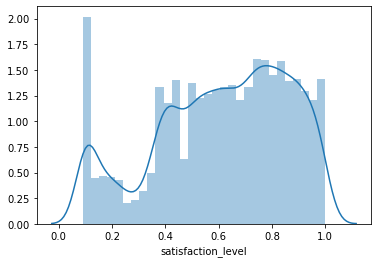

In [13]:
#对数变换前后对比
#对数变换之前
sns.distplot(log_before)
plt.show()

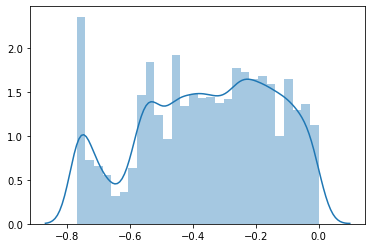

In [14]:
#对数变换之后
sns.distplot(log_after)
plt.show()

### (七)日期格式处理

In [15]:
#导入数据
train_data=pd.read_csv(r"D:\文件\学习\数据集\二手车交易\trainDataAfterCleaning.csv",index_col=False)

In [19]:
from datetime import datetime
#因为regDate字段中月份有存在00这种情况，所以需要单独提出来加工
train_data['year']=pd.DataFrame([str(date)[:4] for date in train_data['regDate']])
train_data['month']=pd.DataFrame([str(date)[4:6] for date in train_data['regDate']])
train_data['day']=pd.DataFrame([str(date)[6:] for date in train_data['regDate']])
train_data=train_data.astype({"year":'int64','month':'int64','day':'int64'})
train_data['month']=train_data['month'].replace(0,3)

In [51]:
from datetime import datetime
train_data['date_time']=[datetime(x,y,z) for x,y,z in zip(train_data['year'],train_data['month'],train_data['day'])]

In [50]:
train_data['d_year']=train_data['date_time'].apply(lambda x:x.year)
train_data['d_month']=train_data['date_time'].apply(lambda x:x.month)
train_data['d_day']=train_data['date_time'].apply(lambda x:x.day)
train_data['d_quarter']=train_data['date_time'].apply(lambda x:x.quarter)
train_data['d_week']=train_data['date_time'].apply(lambda x:x.week)
train_data['d_day_year']=train_data['date_time'].apply(lambda x:x.dayofyear)
train_data['d_hour']=train_data['date_time'].apply(lambda x:x.hour)
train_data['d_minute']=train_data['date_time'].apply(lambda x:x.minute)
train_data['d_second']=train_data['date_time'].apply(lambda x:x.second)

### （八）文本特征处理